In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import DistilBertTokenizer, DistilBertModel
import torch
from sklearn.cluster import KMeans
from tqdm import tqdm
from kneed import KneeLocator
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import itertools

In [3]:
mrqa = load_dataset("mrqa", split="train[:1%]")

In [4]:
words = [question.split(" ") for question in mrqa["question"]]
words = list(itertools.chain.from_iterable(words))
for i, word in enumerate(words):
    words[i] = word.strip("?")

In [5]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-distilled-squad')
model = DistilBertModel.from_pretrained('distilbert-base-uncased-distilled-squad')
pca = PCA(n_components=2)

def embed_word(word):
    inputs = tokenizer(word, return_tensors='pt')
    outputs = model(**inputs)
    # Take the [CLS] token's hidden state as the word embedding
    return outputs.last_hidden_state[:, 0, :].detach().numpy()

In [6]:
full_words = [
    # Question Words
    "who", "what", "where", "when", "why", "how", 
    "which", "whom", "whose", "whatever", "whenever", "wherever", 
    "howsoever", "whosoever",

    # General Words
    "apple", "bank", "spring", "light", "fair", 
    "bat", "rock", "seal", "match", "key", 
    "book", "date", "plant", "row", "jam",

    # Exact Names
    "Einstein", "London", "Amazon", "Tesla", 
    "Mount Everest", "Python", "Harvard", "Google", 
    "Elon Musk", "Shakespeare", "Himalayas", "Coca-Cola", 
    "Eiffel Tower"
]


In [7]:
embedded_full_words = np.array([np.squeeze(embed_word(word)) for word in tqdm(full_words)])

100%|██████████| 42/42 [00:02<00:00, 19.16it/s]


In [8]:
full_words_2d = pca.fit_transform(embedded_full_words)

In [9]:
embedded_words = np.array([np.squeeze(embed_word(word)) for word in tqdm(words[:1000])])

100%|██████████| 1000/1000 [00:34<00:00, 28.96it/s]


In [10]:
words_2d = pca.transform(embedded_words[:1000])

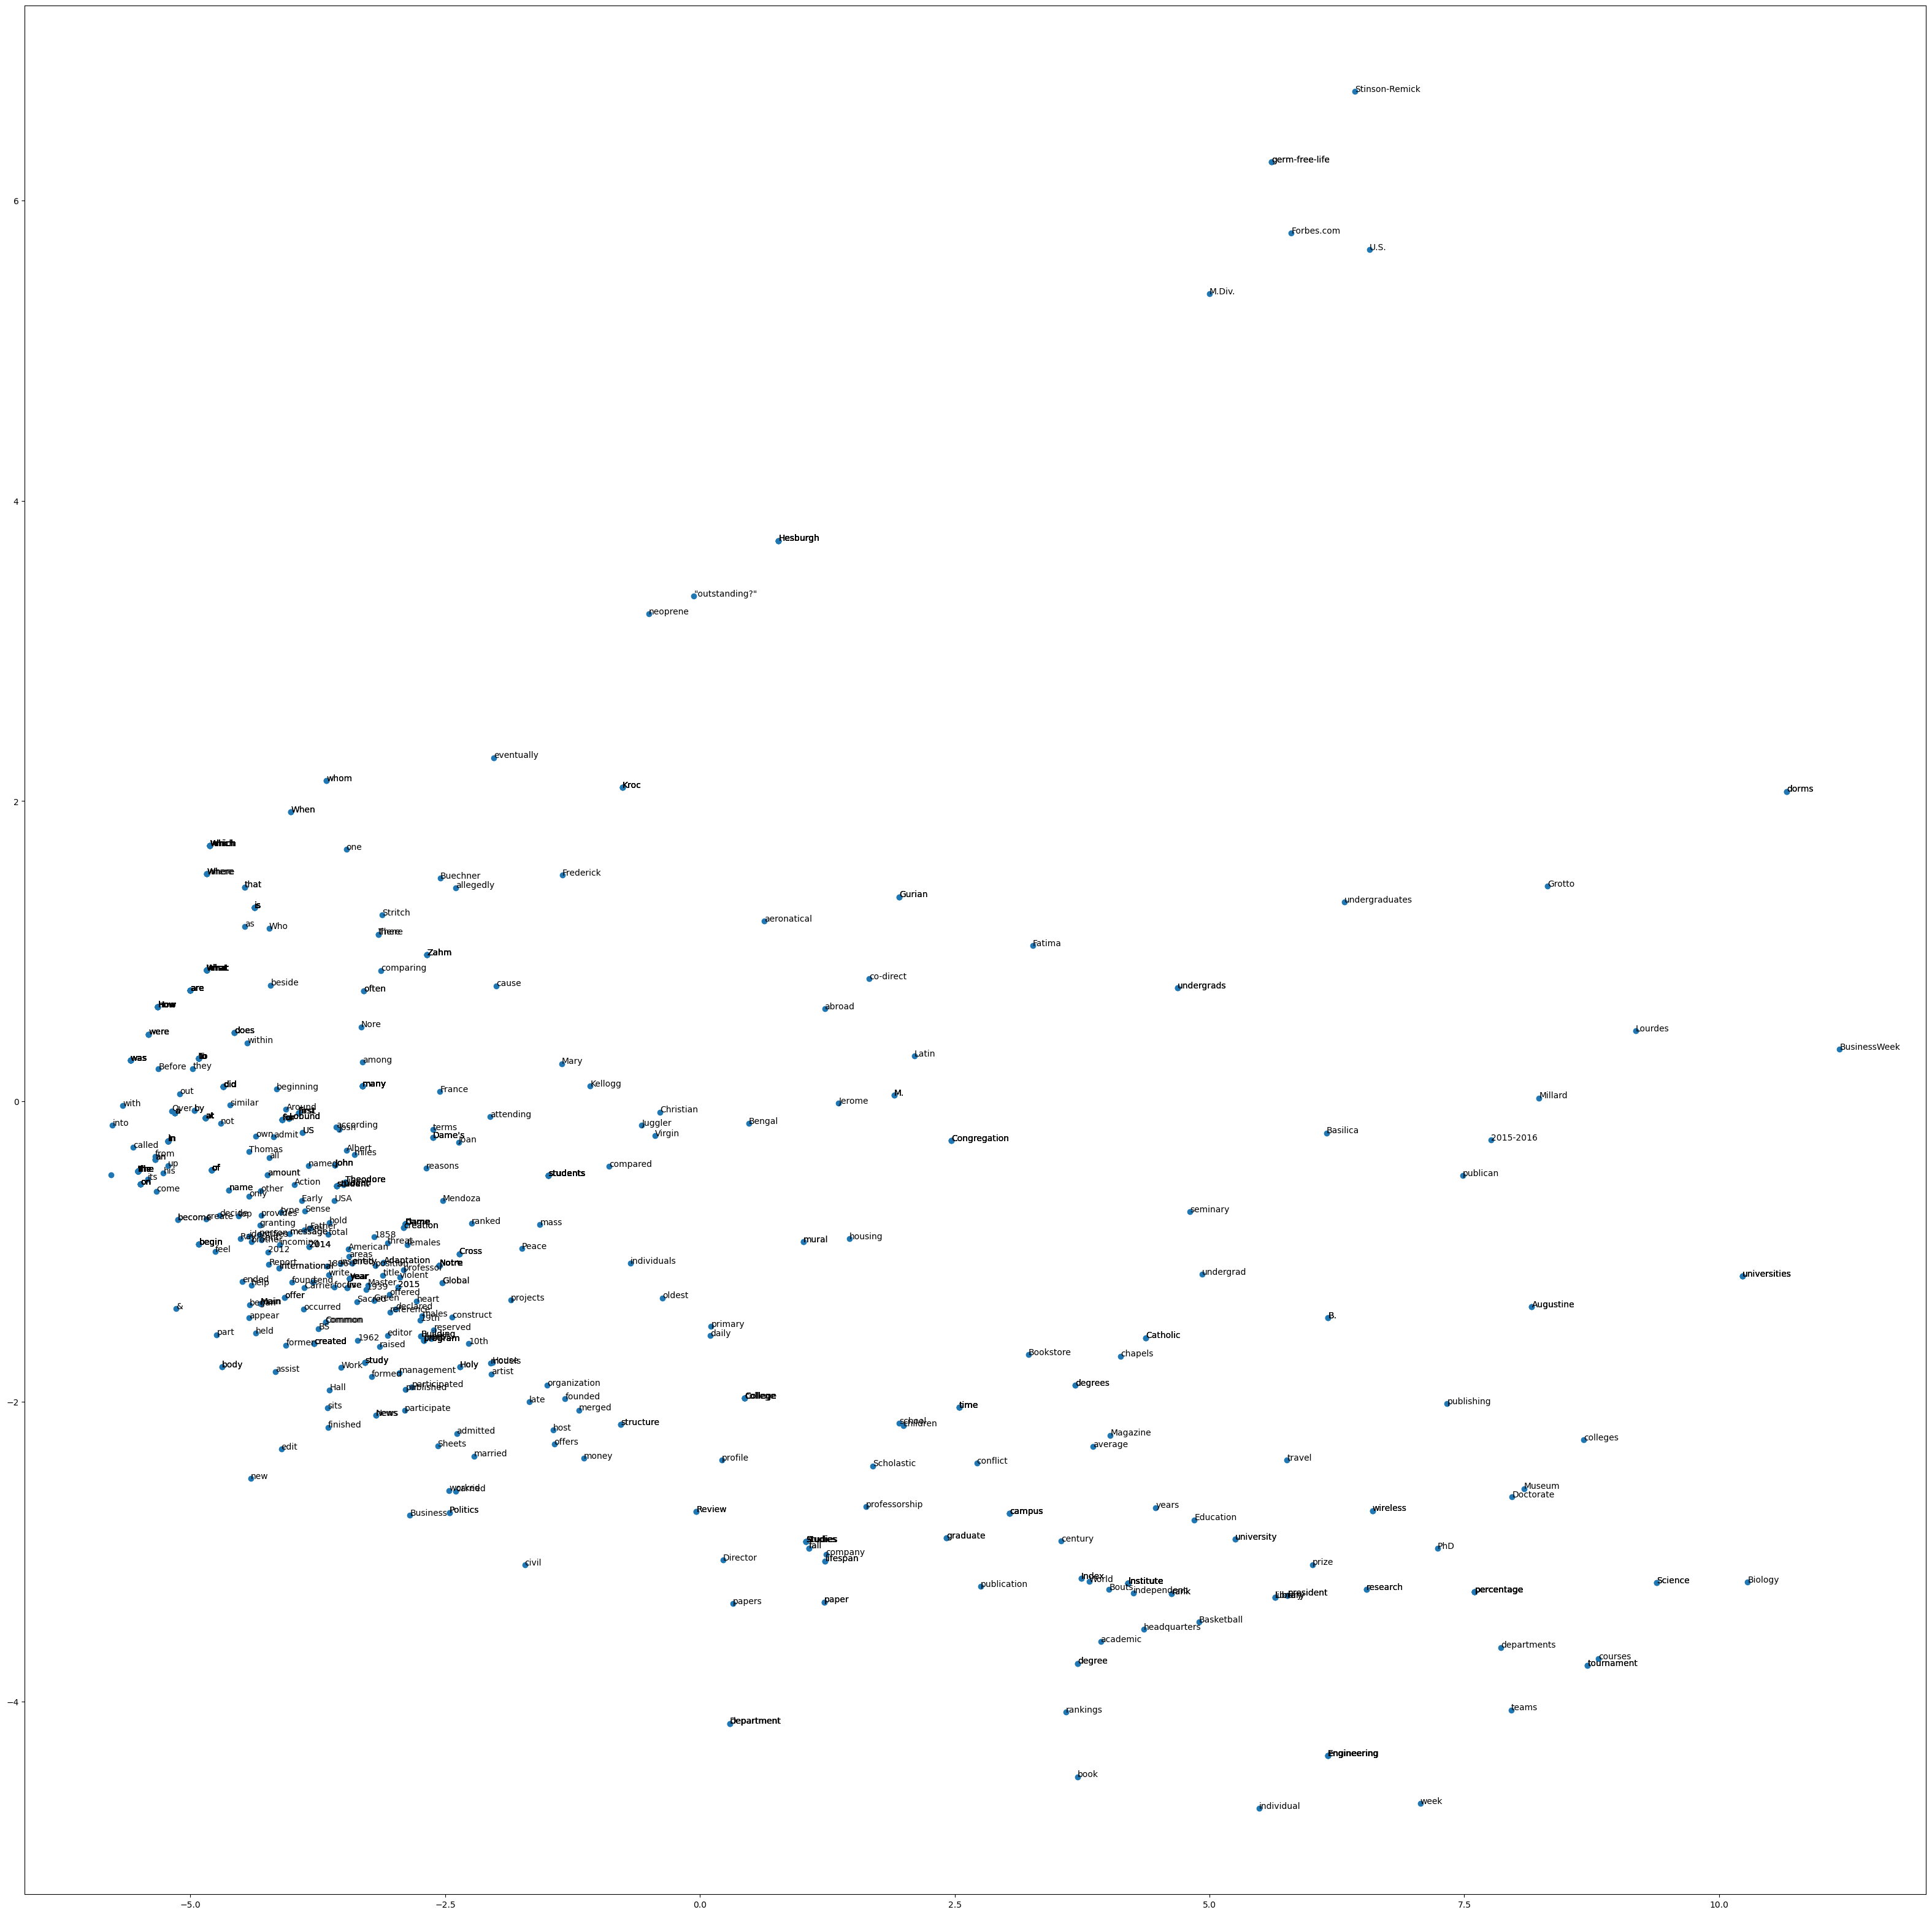

In [11]:
plt.figure(figsize=(40, 40))
plt.scatter(words_2d[:, 0], words_2d[:, 1])
for i, word in enumerate(words[:1000]):
    plt.text(words_2d[i, 0], words_2d[i, 1], word)

In [12]:
firstwords = [question.split(" ")[0:2] for question in mrqa["question"][:1000]]
firstwords

[['To', 'whom'],
 ['What', 'is'],
 ['The', 'Basilica'],
 ['What', 'is'],
 ['What', 'sits'],
 ['Where', 'is'],
 ['What', 'is'],
 ['What', 'is'],
 ['What', 'individuals'],
 ['Which', 'prize'],
 ['How', 'many'],
 ['In', 'what'],
 ['Before', 'the'],
 ['How', 'many'],
 ['The', 'College'],
 ['What', 'entity'],
 ['How', 'many'],
 ['What', 'was'],
 ['Which', 'organization'],
 ['What', 'institute'],
 ['What', 'is'],
 ['In', 'what'],
 ['To', 'whom'],
 ['What', 'company'],
 ['When', 'did'],
 ['How', 'often'],
 ['What', 'is'],
 ['How', 'many'],
 ['In', 'what'],
 ['What', 'is'],
 ['In', 'what'],
 ['Which', 'artist'],
 ['What', 'is'],
 ['The', 'granting'],
 ['What', 'type'],
 ['Which', 'program'],
 ['Which', 'department'],
 ['In', 'what'],
 ['Which', 'professor'],
 ['In', 'what'],
 ['Which', 'individual'],
 ['What', 'did'],
 ['Gurian', 'created'],
 ['What', 'was'],
 ['Over', 'how'],
 ['Thomas', 'Stritch'],
 ['Where', 'did'],
 ['Forbes.com', 'placed'],
 ['The', 'undergrad'],
 ['In', '2014'],
 ['What'

In [15]:
mrqa["question"][1008]

'What did Bryan Lessard name after Beyoncé?'

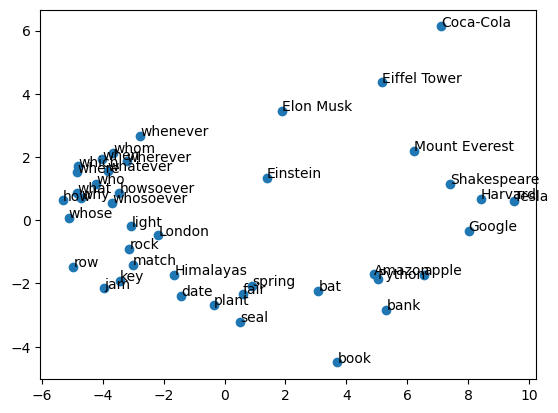

In [17]:
plt.scatter(full_words_2d[:, 0], full_words_2d[:, 1])
for i, word in enumerate(full_words):
    plt.text(full_words_2d[i, 0], full_words_2d[i, 1], word)

In [18]:
mrqa["question"][0]

'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'